In [46]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

In [47]:
# read in the data
data = pd.read_csv("shm_data.csv")
length_training = data.loc[:, "Length"].to_numpy()
print(length_training.shape)
period_training = data.loc[:, "Period"].to_numpy()

(999,)


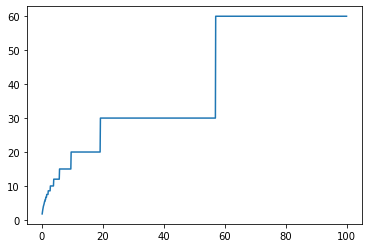

In [48]:
# curious to see how a plot of this looks
plt.plot(length_training, period_training)
# ok... something has gone wrong with the dataset
# we can fix that later
# let's build the model while we're here

In [49]:
# build the model
tf.random.set_seed(random.randint(1, 100))

model = tf.keras.Sequential([tf.keras.layers.Dense(1),
])
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

model.fit(tf.expand_dims(length_training, axis=1), tf.expand_dims(period_training, axis=1), epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 512us/step - loss: 17.4428 - mae: 17.4428
Epoch 2/10
32/32 [==============================] - 0s 463us/step - loss: 10.9281 - mae: 10.9281
Epoch 3/10
32/32 [==============================] - 0s 433us/step - loss: 10.9733 - mae: 10.9733
Epoch 4/10
32/32 [==============================] - 0s 418us/step - loss: 11.0820 - mae: 11.0820
Epoch 5/10
32/32 [==============================] - 0s 457us/step - loss: 11.0949 - mae: 11.0949
Epoch 6/10
32/32 [==============================] - 0s 540us/step - loss: 11.1708 - mae: 11.1708
Epoch 7/10
32/32 [==============================] - 0s 648us/step - loss: 9.6761 - mae: 9.6761
Epoch 8/10
32/32 [==============================] - 0s 497us/step - loss: 10.4067 - mae: 10.4067
Epoch 9/10
32/32 [==============================] - 0s 421us/step - loss: 11.6606 - mae: 11.6606
Epoch 10/10
32/32 [==============================] - 0s 423us/step - loss: 9.8928 - mae: 9.8928


In [50]:
# let's see how the model does
print(model.predict([0.001]))
# at least it's smaller than 0.1...
print(model.predict([900]))
# need to fix issues with training data...
# something about the numerical integration is wacky

1/1 [==============================] - 0s 28ms/step
[[0.8300097]]
1/1 [==============================] - 0s 29ms/step
[[492.16205]]


In [51]:
plt.plot(length_training, period_training)
period_predictions = []
for k in length_training:
    period_predictions.append(model.predict([k]))

plt.plot(length_training, period_predictions)

1/1 [==============================] - 0s 17ms/step
